In [15]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from StringIO import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
import re

In [16]:
election = pd.read_csv("http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv")

In [17]:
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [35]:
election['Start Date'] = pd.to_datetime(election['Start Date'])

In [52]:
ind = map(lambda x: (x.year == 2012) and (x.month == 11), election['Start Date'])

In [55]:
filtered = election[ind]

In [78]:
filtered.drop_duplicates('Pollster', inplace = True)
filtered

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Nonpartisan,None,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Pollster,Dem,NaN,1


In [76]:
M = len(filtered)

In [77]:
print M

18


What was the median of the number of observations in the November polls?

In [79]:
N = np.median(filtered['Number of Observations'])

In [80]:
N

1200.0

In [106]:
np.random.binomial(N,0.53)

649

(array([   3.,   10.,   40.,  135.,  236.,  260.,  194.,   86.,   28.,    8.]),
 array([ 0.4775    ,  0.48733333,  0.49716667,  0.507     ,  0.51683333,
         0.52666667,  0.5365    ,  0.54633333,  0.55616667,  0.566     ,
         0.57583333]),
 <a list of 10 Patch objects>)

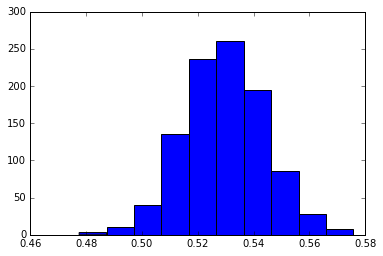

In [109]:
obs = np.random.binomial(N,0.53,1000)/N
plt.hist(obs)

In [113]:
np.std(obs,ddof = 1)

0.014358036745718882

In [116]:
mom = map(lambda x: np.mean(np.random.binomial(N,0.53, size = M)/N),xrange(1000))
mom

[0.53550925925925918,
 0.52907407407407403,
 0.53962962962962957,
 0.5350462962962963,
 0.53050925925925918,
 0.52662037037037046,
 0.52666666666666673,
 0.53458333333333341,
 0.53032407407407411,
 0.53083333333333327,
 0.53050925925925929,
 0.52662037037037035,
 0.53189814814814818,
 0.53236111111111106,
 0.52884259259259259,
 0.5285185185185185,
 0.53319444444444442,
 0.52759259259259261,
 0.52814814814814826,
 0.53435185185185174,
 0.53439814814814823,
 0.53333333333333333,
 0.53018518518518509,
 0.52712962962962961,
 0.52402777777777765,
 0.53208333333333335,
 0.53013888888888905,
 0.5331944444444443,
 0.53166666666666673,
 0.53374999999999995,
 0.52745370370370359,
 0.53810185185185189,
 0.52921296296296305,
 0.53240740740740733,
 0.52680555555555564,
 0.53236111111111106,
 0.52555555555555555,
 0.53319444444444442,
 0.52703703703703697,
 0.52916666666666656,
 0.53138888888888891,
 0.52953703703703703,
 0.53268518518518515,
 0.53328703703703706,
 0.52990740740740749,
 0.5325462962

(array([   4.,   16.,   36.,  100.,  220.,  253.,  193.,  120.,   44.,   14.]),
 array([ 0.51810185,  0.52030556,  0.52250926,  0.52471296,  0.52691667,
         0.52912037,  0.53132407,  0.53352778,  0.53573148,  0.53793519,
         0.54013889]),
 <a list of 10 Patch objects>)

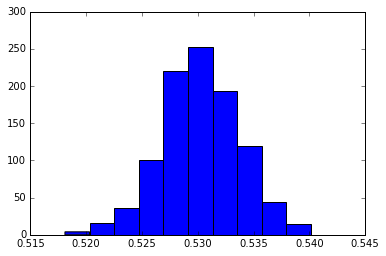

In [117]:
plt.hist(mom)

In [118]:
np.std(mom,ddof = 1)

0.0034959434649014711

In [119]:
np.std(mom, ddof = 1)/np.std(obs, ddof = 1)

0.24348339030012944

In [133]:
stds = map(lambda x: np.std(np.random.binomial(N,0.53, size = M)/N, ddof = 1), xrange(1000))

(array([  10.,   63.,  175.,  292.,  237.,  154.,   50.,   14.,    4.,    1.]),
 array([ 0.00707428,  0.0088612 ,  0.01064812,  0.01243505,  0.01422197,
         0.0160089 ,  0.01779582,  0.01958275,  0.02136967,  0.02315659,
         0.02494352]),
 <a list of 10 Patch objects>)

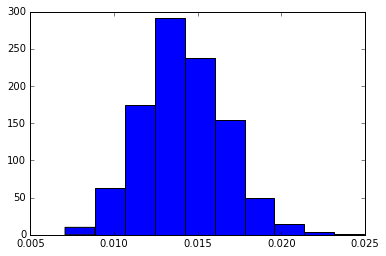

In [134]:
plt.hist(stds)

In [136]:
np.std(filtered["Obama"]/100)

0.010829771494232194

In [138]:
election['Diff'] = election['Obama'] - election['Romney']

In [140]:
election

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,2.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-1.0
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Nonpartisan,None,NaN,1,0.0
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1,1.0
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,2.0
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,0.0
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Pollster,Dem,NaN,1,2.0


In [150]:
election_day = max(election['Start Date'])
last_week = election[map(lambda x: (election_day - x).days <= 5, election["Start Date"])]
days_to_last = map(lambda x: (election_day - x).days, last_week["Start Date"])
days_to_last

[0, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 4, 4, 5, 5]

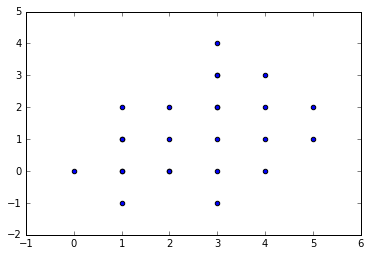

In [151]:
plt.scatter(days_to_last,last_week['Diff'])

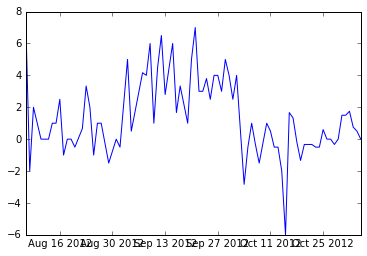

In [197]:
df = election.groupby(['Start Date'], as_index = False).mean()
last_three_month = map(lambda x: (election_day - x).days < 90, df['Start Date'])
final = df[last_three_month]
plt.plot(final['Start Date'],final['Diff'])

In [201]:
url_str = "http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate"

In [203]:
election_urls = [election['url'] + '.csv' for election in requests.get(url_str).json()]
election_urls

[u'http://elections.huffingtonpost.com/pollster/2014-delaware-senate-wade-vs-coons.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-massachusetts-senate-herr-vs-markey.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-rhode-island-senate-zaccaria-vs-reed.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-montana-senate-daines-vs-curtis.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-oklahoma-senate-lankford-vs-johnson.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-hawaii-senate-cavasso-vs-schatz.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-kansas-senate-roberts-vs-orman-vs-taylor.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-wyoming-senate.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-tennessee-senate-alexander-vs-ball.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-idaho-senate-risch-vs-mitchell.csv',
 u'http://elections.huffingtonpost.com/pollster/2014-new-jersey-senate-bell-vs-booker

In [204]:
def build_frame(url):
    """
    Returns a pandas DataFrame object containing
    the data returned from the given url
    """
    source = requests.get(url).text
    
    # Use StringIO because pd.DataFrame.from_csv requires .read() method
    s = StringIO(source)
    
    return pd.DataFrame.from_csv(s, index_col=None).convert_objects(
            convert_dates="coerce", convert_numeric=True)

In [205]:
dfs = dict((election.split("/")[-1][:-4], build_frame(election)) for election in election_urls)

/Users/jieli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [211]:
dfs['2014-kentucky-senate-mcconnell-vs-grimes']

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Grimes,McConnell,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-10-30,2014-11-01,2014-11-02 01:44:58,1503,Likely Voters,IVR/Online,42.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,NBC/Marist,2014-10-27,2014-10-30,2014-11-02 14:37:22,556,Likely Voters,Live Phone,41.0,50.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://newscms.nbcnews.com/sites/newscms/files...,Nonpartisan,None,NaN,1
2,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-25,2014-10-29,2014-10-30 23:33:59,597,Likely Voters,IVR/Online,43.0,48.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
3,POS (R-Crossroads GPS),2014-10-25,2014-10-27,2014-10-30 20:56:18,600,Likely Voters,Live Phone,43.0,50.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://www.crossroadsgps.org/wp-content/uploa...,Pollster,Rep,NaN,1
4,CBS/NYT/YouGov,2014-10-16,2014-10-23,2014-10-26 15:00:07,1502,Likely Voters,Internet,39.0,45.0,14.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2014/09/07/battl...,Nonpartisan,None,NaN,1
5,VCR (R-McConnell),2014-10-16,2014-10-21,2014-10-22 20:51:03,815,Likely Voters,Live Phone,41.0,49.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/VCRMcConn...,Pollster,Rep,NaN,1
6,Western Kentucky University,2014-10-16,2014-10-19,2014-10-21 11:18:33,557,Likely Voters,Live Phone,42.0,45.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://wkussrc.blogspot.com/2014/10/2014-big-r...,Nonpartisan,None,NaN,1
7,SurveyUSA/Courier-Journal/Herald-Leader/WHAS/WKYT,2014-10-15,2014-10-19,2014-10-20 22:11:55,655,Likely Voters,IVR/Online,43.0,44.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.surveyusa.com/client/PollReport.asp...,Nonpartisan,None,NaN,1
8,Rasmussen,2014-10-15,2014-10-16,2014-10-17 16:57:36,1000,Likely Voters,Automated Phone,44.0,52.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
9,Gravis/Human Events (R),2014-10-11,2014-10-12,2014-10-20 01:55:53,1020,Likely Voters,Automated Phone,47.0,50.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://gravismarketing.com/polling-and-market-...,Nonpartisan,None,NaN,1


In [217]:
dat = dfs['2014-kentucky-senate-mcconnell-vs-grimes']

In [223]:
np.round(np.mean(dat['Grimes']/100 - dat['McConnell']/100),3)

-0.029999999999999999